<a href="https://colab.research.google.com/github/AdityaFaisal/CRISP-DM/blob/main/TugasAkhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
from pprint import pprint
from datetime import datetime


Data Understanding


In [77]:
df =  pd.read_csv("data-sebaran-smk.csv") 

Menampilkan Data Dari Dataset yang diinput


In [31]:
df.head(5)

,npsn,nama_sekolah,alamat,kelurahan,kecamatan,jumlah_siswa,jumlah_guru,kepala_sekolah,telp_sekolah,akreditasi,latitude,longitude
0,11298527,SMK Insan Aqilah 4 Jakarta,Jl. Penerangan No. IA,Wijaya Kusuma,Grogol Petamburan,47,6.0,Kartika Vica Zuspita,021 5688893,Tidak Terakreditasi,NaN,NaN
1,20100104,SMK Kartini 1 Jakarta,Jl. Katini Raya No. 26,Kartini,Sawah Besar,139,8.0,NaN,021 6597662,A,-6.158000,106.836601
2,20100105,SMK Kampung Jawa Jakarta,Jl. Percetakan Negara 2,Johar Baru,Johar Baru,384,29.0,NaN,021 4212680,B,-6.186982,106.856354
3,20100108,SMK Jakarta Pusat 1,Jl. Abdul Muis No. 44,Petojo Selatan,Gambir,704,45.0,"LILIK BINTORO TP. SH., MM.",021 3843975,A,-6.175566,106.820168
4,20100110,SMK Katolik Sint Joseph Jakarta,Jl. Kramat Raya No. 134,Kenari,Senen,28,9.0,"YOVITA TRIWILUDJENG, S.Pd",021 31904023,B,-6.188142,106.846024


In [79]:
df.shape

(601, 12)

In [82]:
df.describe(include='all')

,npsn,nama_sekolah,alamat,kelurahan,kecamatan,jumlah_siswa,jumlah_guru,kepala_sekolah,telp_sekolah,akreditasi,latitude,longitude
count,596,601,601,601,601,601.000000,599.000000,565,597,600,579.000000,579.000000
unique,595,597,572,210,43,NaN,NaN,564,580,4,NaN,NaN
top,20101674,SMK Dewi Sartika,Jl. Raya Bekasi Km. 26,Srengseng Sawah,Cakung,NaN,NaN,Djuwatno,021 43938541,A,NaN,NaN
freq,2,2,4,11,33,NaN,NaN,2,2,307,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,276.996672,24.954925,NaN,NaN,NaN,-6.215503,106.837901
std,NaN,NaN,NaN,NaN,NaN,304.265312,14.808351,NaN,NaN,NaN,0.076740,0.076490
min,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,-6.822000,106.249939
25%,NaN,NaN,NaN,NaN,NaN,71.000000,15.000000,NaN,NaN,NaN,-6.262008,106.796730
50%,NaN,NaN,NaN,NaN,NaN,172.000000,21.000000,NaN,NaN,NaN,-6.203148,106.844368
75%,NaN,NaN,NaN,NaN,NaN,385.000000,31.000000,NaN,NaN,NaN,-6.160683,106.888176


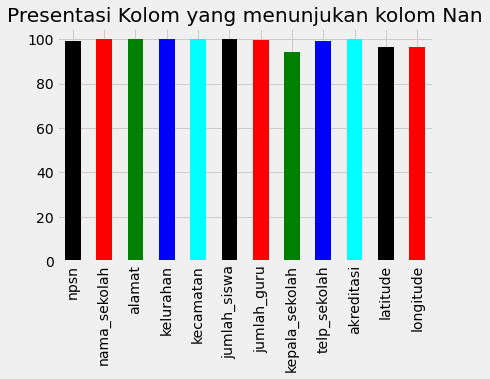

In [85]:
(100*df.notna().mean()).plot(kind='bar', title='Presentasi Kolom yang menunjukan kolom Nan', color=['black', 'red', 'green', 'blue', 'cyan']);

In [107]:
df = df[df['kepala_sekolah'].isna()]

df.describe(include='all')

,npsn,nama_sekolah,alamat,kelurahan,kecamatan,jumlah_siswa,jumlah_guru,kepala_sekolah,telp_sekolah,akreditasi,latitude,longitude
count,35,36,36,36,36,36.000000,34.000000,0,35,36,31.000000,31.000000
unique,35,36,36,32,23,NaN,NaN,0,34,3,NaN,NaN
top,20101496,SMK Budi Asih,Jl. Raya Cilandak KKO,Ujung Menteng,Cakung,NaN,NaN,NaN,021 22813291,A,NaN,NaN
freq,1,1,1,3,5,NaN,NaN,NaN,2,20,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,260.277778,24.382353,NaN,NaN,NaN,-6.202749,106.827241
std,NaN,NaN,NaN,NaN,NaN,204.807591,11.273500,NaN,NaN,NaN,0.096592,0.137098
min,NaN,NaN,NaN,NaN,NaN,0.000000,8.000000,NaN,NaN,NaN,-6.339900,106.249939
25%,NaN,NaN,NaN,NaN,NaN,95.500000,14.250000,NaN,NaN,NaN,-6.254416,106.802486
50%,NaN,NaN,NaN,NaN,NaN,204.000000,24.000000,NaN,NaN,NaN,-6.190640,106.844589
75%,NaN,NaN,NaN,NaN,NaN,397.250000,31.000000,NaN,NaN,NaN,-6.169858,106.898967


Dapat dilihat bahwa hanya kolom kepala_sekolah yang memiliki Nan Lebih rendah dari yg lain, Sekarang kita akan memeriksa apakah nilai pada kolom kepala sekolah 
yang tidak terisi terjadi pada saat yang sama saat listing tidak tersedia


Melihat beberapa
 Atribut dataset lebih rinci

In [97]:
df['akreditasi'].value_counts()

A                      20
B                      15
Tidak Terakreditasi     1
Name: akreditasi, dtype: int64

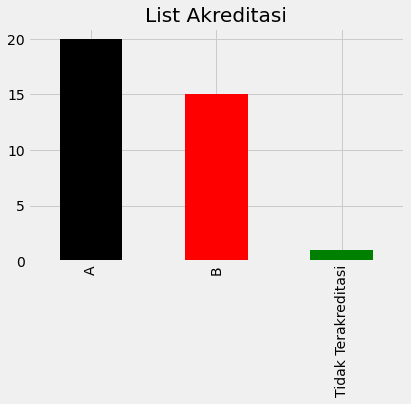

In [101]:
(df['akreditasi'].value_counts()).plot(kind='bar', title='List Akreditasi', color=['black', 'red', 'green', 'blue', 'cyan']);

In [104]:
df['jumlah_guru'].value_counts()

13.0    3
14.0    2
29.0    2
31.0    2
36.0    2
15.0    2
8.0     2
11.0    2
24.0    2
23.0    1
19.0    1
35.0    1
33.0    1
28.0    1
38.0    1
17.0    1
30.0    1
27.0    1
22.0    1
46.0    1
32.0    1
57.0    1
21.0    1
26.0    1
Name: jumlah_guru, dtype: int64

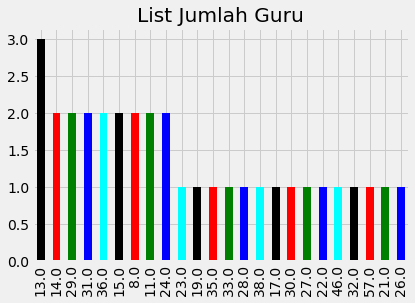

In [106]:
(df['jumlah_guru'].value_counts()).plot(kind='bar', title='List Jumlah Guru', color=['black', 'red', 'green', 'blue', 'cyan']);

In [108]:
df['jumlah_siswa'].value_counts()

0      2
56     1
177    1
603    1
641    1
153    1
437    1
531    1
44     1
79     1
222    1
13     1
332    1
139    1
200    1
169    1
29     1
172    1
382    1
625    1
140    1
59     1
696    1
41     1
501    1
307    1
493    1
321    1
459    1
208    1
317    1
236    1
103    1
101    1
384    1
Name: jumlah_siswa, dtype: int64

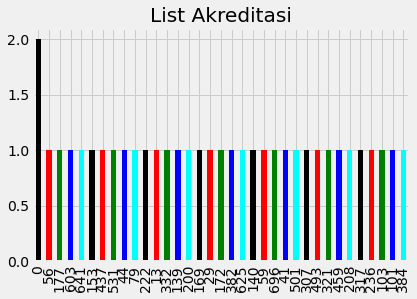

In [109]:
(df['jumlah_siswa'].value_counts()).plot(kind='bar', title='List Akreditasi', color=['black', 'red', 'green', 'blue', 'cyan']);

DATA PREPARATION

In [110]:
df.head()

,npsn,nama_sekolah,alamat,kelurahan,kecamatan,jumlah_siswa,jumlah_guru,kepala_sekolah,telp_sekolah,akreditasi,latitude,longitude
1,20100104,SMK Kartini 1 Jakarta,Jl. Katini Raya No. 26,Kartini,Sawah Besar,139,8.0,NaN,021 6597662,A,-6.158000,106.836601
2,20100105,SMK Kampung Jawa Jakarta,Jl. Percetakan Negara 2,Johar Baru,Johar Baru,384,29.0,NaN,021 4212680,B,-6.186982,106.856354
6,20100114,SMK Ksatrya Jakarta,Jl. Percetakan Negara D232,Cempaka Putih Timur,Cempaka Putih,307,35.0,NaN,021 4256689,A,-6.187400,106.869667
37,20100165,SMK Negeri 31,Jl. Kramat Jaya Baru Blok D II,Johar Baru,Johar Baru,531,33.0,NaN,021 4246015,A,-6.181825,106.851952
56,20101468,SMK Wiyata Satya,Jl. Taman Mutiara Prima No 3 Gili Sampeng Kebo...,Kemanggisan,Palmerah,501,28.0,NaN,021 53667809,B,-6.190640,106.794090


In [111]:
df['npsn'] = pd.to_numeric(df['npsn'])

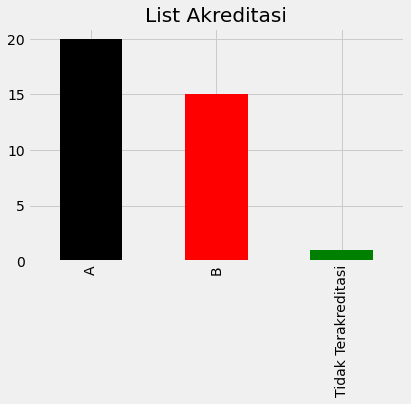

In [115]:
(df['akreditasi'].value_counts()).plot(kind='bar', title='List Akreditasi', color=['black', 'red', 'green', 'blue', 'cyan']);

Modelling Data

membuat kerangka data yang mampu menunjukkan kinerja yang berbeda dari algoritma.

In [117]:
df_algorthm_perfo = pd.DataFrame(index=['r2_score_train','r2_score_test'], columns=['Ada_Boost_Regressor'])
df_algorthm_perfo.fillna(0, inplace=True)
df_algorthm_perfo.head()

,Ada_Boost_Regressor
r2_score_train,0
r2_score_test,0


membagi data menjadi susunan dan pengujian dengan ukuran pengujian menjadi 30% dari data

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [120]:
param_dist = {
 'n_estimators': [500, 2000],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }



adamodel = RandomizedSearchCV(AdaBoostRegressor(), param_distributions = param_dist, cv=3, n_iter = 20, n_jobs=-1);
                              
adamodel.fit(X_train, y_train)
y_pred_test = adamodel.predict(X_test)
y_pred_train = adamodel.predict(X_train)
df_algorthm_perfo.loc['r2_score_test','Ada_Boost_Regressor'] = r2_score(y_test, y_pred_test)
df_algorthm_perfo.loc['r2_score_train','Ada_Boost_Regressor'] = r2_score(y_train, y_pred_train)

ValueError: ignored

Decission Tree

In [121]:
df['Decision_Tree_Regressor'] = 0

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

def root_mean_squared_error(y_true, y_pred):
    ''' Root mean squared error regression loss
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Ground truth (correct) target values.

    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Estimated target values.
    '''
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)




pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

depths = np.arange(1, 20)

num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]

gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=10)

gs = gs.fit(X_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)
my_model = gs.best_estimator_
my_model.fit(X_train, y_train)
y_pred_test_DT = my_model.predict(X_test)
y_pred_train_DT = my_model.predict(X_train) 
df_algorthm_perfo.loc['r2_score_test','Decision_Tree_Regressor'] = r2_score(y_test, y_pred_test_DT)
df_algorthm_perfo.loc['r2_score_train','Decision_Tree_Regressor'] = r2_score(y_train, y_pred_train_DT)

In [ ]:
df_algorthm_perfo.head()